In [1]:
# ! pip install dask leidenalg

In [2]:
import sys

path_src = '../src'
sys.path.append(path_src)
import importlib
import SpatialAnalysis as SpAn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
import networkx as nx
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors
from scipy.stats import entropy

path_src = '../../'
sys.path.append(path_src)
# import mosna2 as mosna


# 1 - Isolated Niches (Different Cell Types): Spatial or Molecular

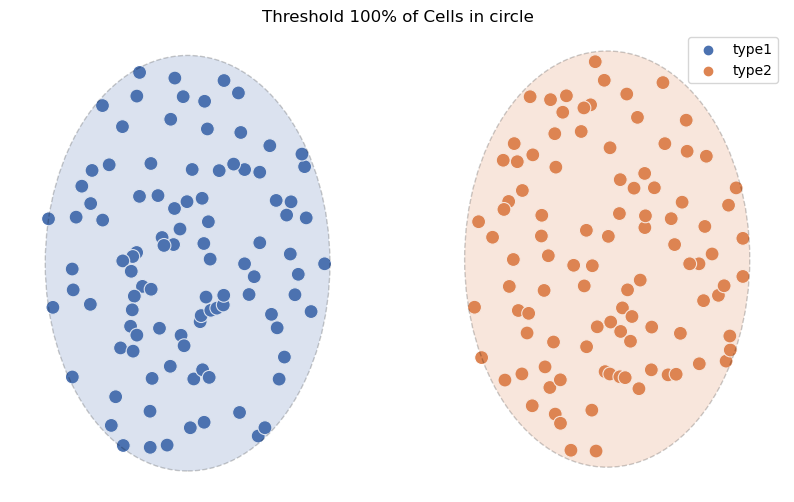

<Axes: title={'center': 'Threshold 100% of Cells in circle'}>

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate points within a circle
def generate_circle_points(center, radius, num_points, phenotype):
    angles = np.linspace(0, 2 * np.pi, num_points)
    radii = np.sqrt(np.random.rand(num_points)) * radius
    x = center[0] + radii * np.cos(angles)
    y = center[1] + radii * np.sin(angles)
    phenotypes = [phenotype] * num_points
    return pd.DataFrame({'x': x, 'y': y, 'phenotype': phenotypes})

# Parameters
center_type1 = (10, 10)
center_type2 = (25, 10)
radius = 5
num_points = 100

# Generate points for each circle
df_type1 = generate_circle_points(center_type1, radius, num_points, 'type1')
df_type2 = generate_circle_points(center_type2, radius, num_points, 'type2')

# Combine the data into a single DataFrame
df = pd.concat([df_type1, df_type2], ignore_index=True)

var = 'phenotype'
SpAn.plot_cells_with_circles(df[['x','y']], df[var], quantile_threshold=1, alpha=0.2)



# 2 - Adjacent Niches Without Overlap (Spatial + Molecular)



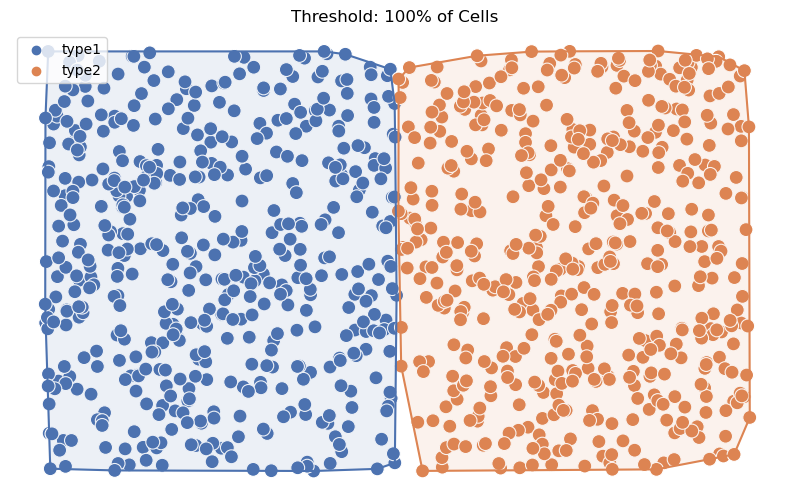

<Axes: title={'center': 'Threshold: 100% of Cells '}>

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate points within a rectangle
def generate_rectangle_points(x_start, y_start, width, height, num_points, phenotype):
    x = np.random.uniform(x_start, x_start + width, num_points)
    y = np.random.uniform(y_start, y_start + height, num_points)
    phenotypes = [phenotype] * num_points
    return pd.DataFrame({'x': x, 'y': y, 'phenotype': phenotypes})

# Parameters for the rectangles
width = 2
height = 2
num_points = 500
rectangle1_x_start = 0
rectangle1_y_start = 0
rectangle2_x_start = width  # Next to the first rectangle
rectangle2_y_start = 0

# Generate points for each rectangle
df_type1 = generate_rectangle_points(rectangle1_x_start, rectangle1_y_start, width, height, num_points, 'type1')
df_type2 = generate_rectangle_points(rectangle2_x_start, rectangle2_y_start, width, height, num_points, 'type2')

# Combine the data into a single DataFrame
df = pd.concat([df_type1, df_type2], ignore_index=True)

var = 'phenotype'
SpAn.plot_cells_with_hulls(df[['x','y']], df[var], quantile_threshold=1, alpha=0.1)



# 3 - Partial Overlapping Niches (Spatial + Molecular)

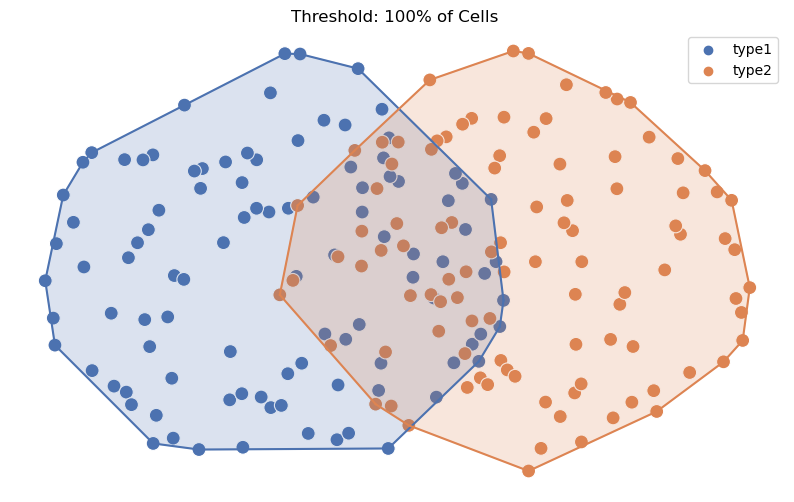

<Axes: title={'center': 'Threshold: 100% of Cells '}>

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate points within a circle
def generate_circle_points(center, radius, num_points, phenotype):
    angles = np.linspace(0, 2 * np.pi, num_points)
    radii = np.sqrt(np.random.rand(num_points)) * radius
    x = center[0] + radii * np.cos(angles)
    y = center[1] + radii * np.sin(angles)
    phenotypes = [phenotype] * num_points
    return pd.DataFrame({'x': x, 'y': y, 'phenotype': phenotypes})

# Parameters
center_type1 = (15, 10)
center_type2 = (20, 10)
radius = 5
num_points = 100

# Generate points for each circle
df_type1 = generate_circle_points(center_type1, radius, num_points, 'type1')
df_type2 = generate_circle_points(center_type2, radius, num_points, 'type2')

# Combine the data into a single DataFrame
df = pd.concat([df_type1, df_type2], ignore_index=True)

var = 'phenotype'
SpAn.plot_cells_with_hulls(df[['x','y']], df[var], quantile_threshold=1, alpha=0.2)



# 4 - Gradual Transition Zones

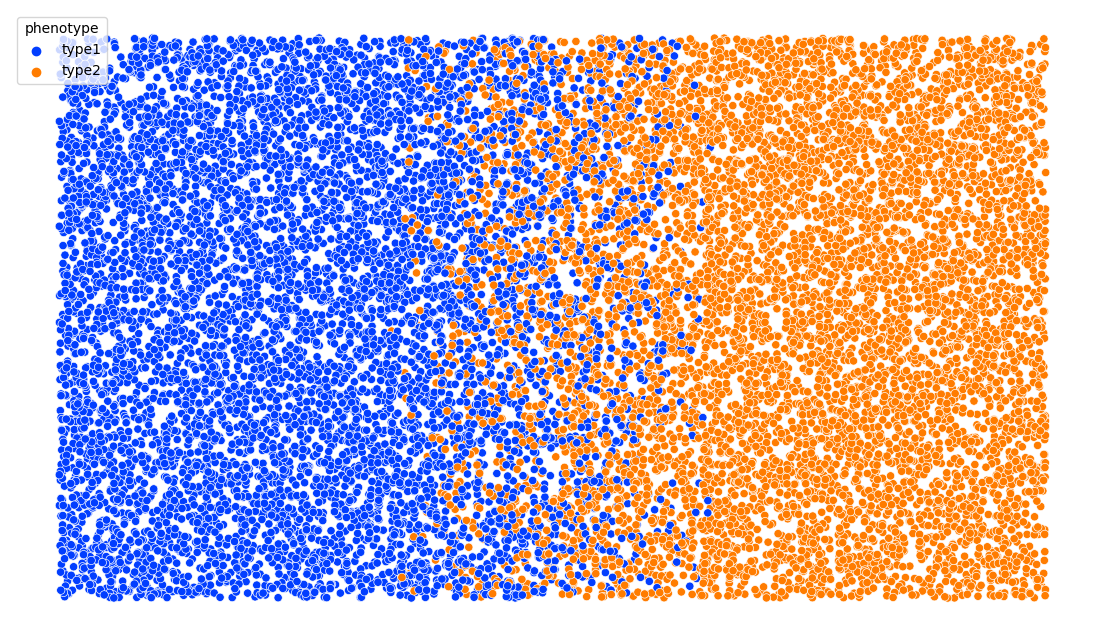

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate points within a rectangle
def generate_rectangle_points(x_start, y_start, width, height, num_points, phenotype):
    x = np.random.uniform(x_start, x_start + width, num_points)
    y = np.random.uniform(y_start, y_start + height, num_points)
    phenotypes = [phenotype] * num_points
    return pd.DataFrame({'x': x, 'y': y, 'phenotype': phenotypes})

# Function to generate gradient phenotype distribution within a rectangle
def generate_gradient_rectangle(x_start, y_start, width, height, num_points, phenotype1, phenotype2):
    x = np.random.uniform(x_start, x_start + width, num_points)
    y = np.random.uniform(y_start, y_start + height, num_points)
    phenotypes = []

    for xi in x:
        # Calculate the proportion of phenotype1 vs phenotype2 based on the x position
        proportion_type1 = (x_start + width - xi) / width
        if np.random.rand() < proportion_type1:
            phenotypes.append(phenotype1)
        else:
            phenotypes.append(phenotype2)

    return pd.DataFrame({'x': x, 'y': y, 'phenotype': phenotypes})

# Parameters for the rectangles
width = 20
height = 10
num_points = 5000

# Generate points for each rectangle
left_df = generate_rectangle_points(-width, 0, width, height, num_points, 'type1')
gradient_df = generate_gradient_rectangle(0, 0, width, height, num_points, 'type1', 'type2')
right_df = generate_rectangle_points(width, 0, width, height, num_points, 'type2')

# Combine the data into a single DataFrame
df = pd.concat([left_df, gradient_df, right_df], ignore_index=True)

# Plot using seaborn
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='x', y='y', hue='phenotype', palette='bright')
plt.axis('off')
plt.show()


# 5- Molecular Doublets (Niches = A+B | C+D)

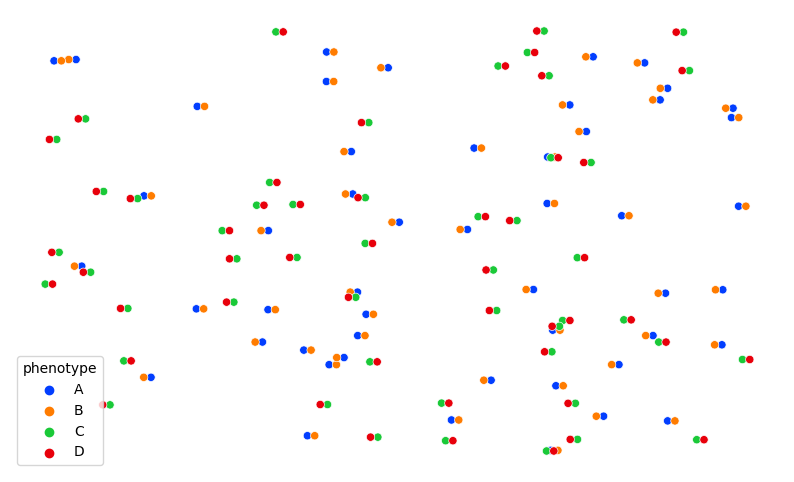

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate doublets with specific displacements
def generate_doublets(center, num_pairs, phenotype1, phenotype2):
    x1 = center[0] + np.random.uniform(-50, 50, num_pairs)
    y1 = center[1] + np.random.uniform(-50, 50, num_pairs)
    
    directions = np.random.choice(['right', 'left'], num_pairs)
    x2 = np.copy(x1)
    y2 = np.copy(y1)
    
    for i, direction in enumerate(directions):
        if direction == 'right':
            x2[i] += 1
        elif direction == 'left':
            x2[i] -= 1
        elif direction == 'top':
            y2[i] += 1
        elif direction == 'bottom':
            y2[i] -= 1
    
    data1 = {'x': x1, 'y': y1, 'phenotype': [phenotype1] * num_pairs}
    data2 = {'x': x2, 'y': y2, 'phenotype': [phenotype2] * num_pairs}
    
    df1 = pd.DataFrame(data1)
    df2 = pd.DataFrame(data2)
    
    return pd.concat([df1, df2], ignore_index=True)

# Parameters
num_pairs = 50

# Generate doublets for A+B and C+D
center_AB = (10, 10)
center_CD = (10, 10)

df_AB = generate_doublets(center_AB, num_pairs, 'A', 'B')
df_CD = generate_doublets(center_CD, num_pairs, 'C', 'D')

# Combine the data into a single DataFrame
df_doublets = pd.concat([df_AB, df_CD], ignore_index=True)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_doublets, x='x', y='y', hue='phenotype', palette='bright')
plt.axis('off')
plt.show()

# 6 - Random Distribution of Spatial and Phenotypic Traits (Control)

# 7 - Boundary Interaction Zones

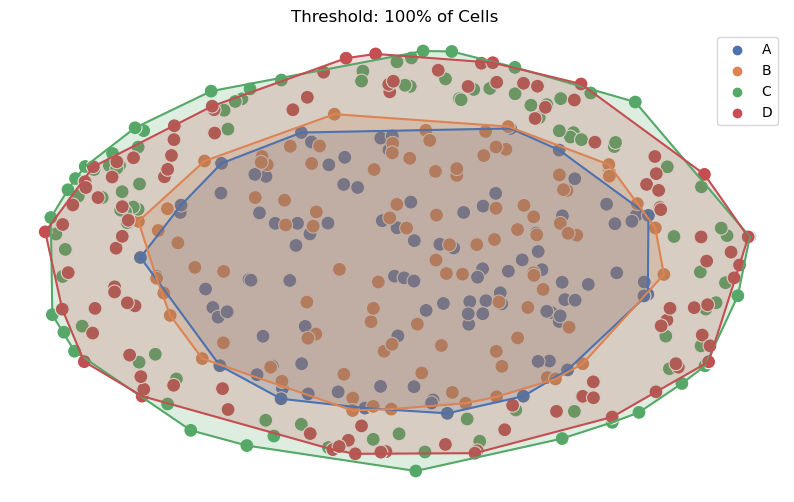

<Axes: title={'center': 'Threshold: 100% of Cells '}>

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate points within a circle
def generate_circle_points(center, radius, num_points, phenotype):
    angles = np.random.uniform(0, 2 * np.pi, num_points)
    radii = radius * np.sqrt(np.random.uniform(0, 1, num_points))
    x = center[0] + radii * np.cos(angles)
    y = center[1] + radii * np.sin(angles)
    phenotypes = [phenotype] * num_points
    return pd.DataFrame({'x': x, 'y': y, 'phenotype': phenotypes})

# Function to generate points within a donut-shaped region
def generate_donut_points(center, inner_radius, outer_radius, num_points, phenotype):
    angles = np.random.uniform(0, 2 * np.pi, num_points)
    radii = np.sqrt(np.random.uniform(inner_radius**2, outer_radius**2, num_points))
    x = center[0] + radii * np.cos(angles)
    y = center[1] + radii * np.sin(angles)
    phenotypes = [phenotype] * num_points
    return pd.DataFrame({'x': x, 'y': y, 'phenotype': phenotypes})

# Parameters
num_points_inner = 200
num_points_outer = 200
center = (10, 10)
inner_radius = 3
outer_radius = 4

# Generate points for the inner circle with phenotypes A and B
df_inner_A = generate_circle_points(center, inner_radius, num_points_inner // 2, 'A')
df_inner_B = generate_circle_points(center, inner_radius, num_points_inner // 2, 'B')

# Generate points for the donut-shaped region with phenotypes C and D
df_outer_C = generate_donut_points(center, inner_radius, outer_radius, num_points_outer // 2, 'C')
df_outer_D = generate_donut_points(center, inner_radius, outer_radius, num_points_outer // 2, 'D')

# Combine the data into a single DataFrame
df_boundary_zones = pd.concat([df_inner_A, df_inner_B, df_outer_C, df_outer_D], ignore_index=True)



SpAn.plot_cells_with_hulls(df_boundary_zones[['x','y']], df_boundary_zones[var], quantile_threshold=1, alpha=0.2)

# 8 - Rare Cell Populations in Specific Microenvironments

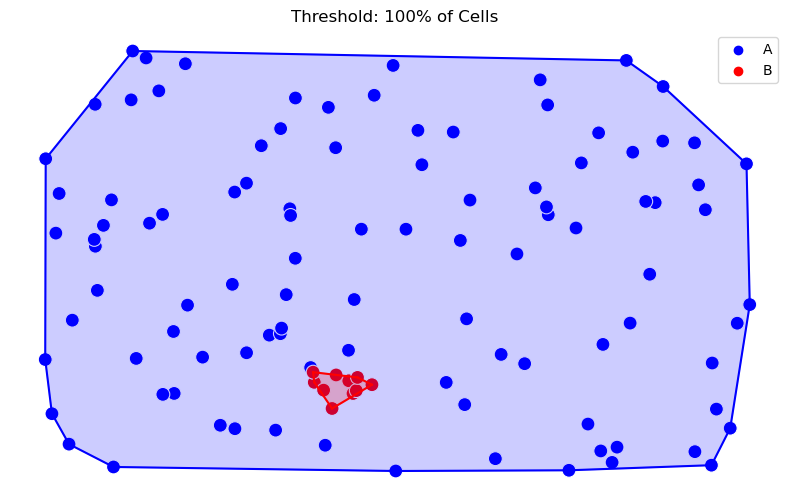

<Axes: title={'center': 'Threshold: 100% of Cells '}>

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate points within a rectangle
def generate_rectangle_points(x_start, y_start, width, height, num_points, phenotype, exclusion_zone=None):
    x = []
    y = []
    while len(x) < num_points:
        x_rand = np.random.uniform(x_start, x_start + width)
        y_rand = np.random.uniform(y_start, y_start + height)
        if exclusion_zone:
            x_ex_start, y_ex_start, width_ex, height_ex = exclusion_zone
            if (x_ex_start <= x_rand <= x_ex_start + width_ex) and (y_ex_start <= y_rand <= y_ex_start + height_ex):
                continue
        x.append(x_rand)
        y.append(y_rand)
    phenotypes = [phenotype] * num_points
    return pd.DataFrame({'x': x, 'y': y, 'phenotype': phenotypes})

# Parameters for the rectangles
width_A = 20
height_A = 10
num_points_A = 100
num_points_B = int(0.1 * num_points_A)

width_B = width_A * 0.1
height_B = height_A * 0.1

# Generate a random location for rectangle B within rectangle A
x_start_B = np.random.uniform(0, width_A - width_B)
y_start_B = np.random.uniform(0, height_A - height_B)

# Generate points for each rectangle
exclusion_zone = (x_start_B, y_start_B, width_B, height_B)
df_A = generate_rectangle_points(0, 0, width_A, height_A, num_points_A, 'A', exclusion_zone)
df_B = generate_rectangle_points(x_start_B, y_start_B, width_B, height_B, num_points_B, 'B')

# Combine the data into a single DataFrame
df_rectangles = pd.concat([df_A, df_B], ignore_index=True)

SpAn.plot_cells_with_hulls(df_rectangles[['x','y']], df_rectangles[var], quantile_threshold=1, alpha=0.2, color_dict = {'A':'blue','B':'red'})
